# SALES PROJECT

## Import libarary

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## import Dataset

In [3]:
month=['Sales_April_2019.csv','Sales_August_2019.csv','Sales_December_2019.csv','Sales_February_2019.csv','Sales_January_2019.csv',
      'Sales_July_2019.csv','Sales_June_2019.csv','Sales_March_2019.csv','Sales_May_2019.csv','Sales_November_2019.csv',
       'Sales_October_2019.csv','Sales_September_2019.csv']

# combine all dataset 
dataframe=[]
for file in month:
    df=pd.read_csv(file)
    dataframe.append(df)
    
all_data=pd.concat(dataframe,ignore_index=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Null values

In [6]:
# check NaN values
null_value=all_data[all_data.isna().any(axis=1)]
print(null_value.head())

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN


In [7]:
# drop null values
data=all_data.dropna(how='all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
# reset index
data.reset_index(inplace=True)
data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
df=data[data['Order Date'].str[0:2]!='Or']

### Change Datatype

In [10]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Order Date']=pd.to_datetime(df['Order Date'])
df.head()

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\3315958121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\3315958121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each']=pd.to_numeric(df['Price Each'])
C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\3315958121.py:3: UserWarning: Could not infer format, so each element will be parsed individuall

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             185950 non-null  int64         
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


## Data Extraction

In [12]:
## Add month column

In [13]:
df['Month']=pd.to_datetime(df['Order Date']).dt.month

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\2280755735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df['Order Date']).dt.month


In [14]:
## Add sales column

In [15]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
df

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\81446793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']=df['Quantity Ordered']*df['Price Each']


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186303,186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [16]:
## Add city column

In [17]:
def city(address):
    return address.split(',')[1]

def state(address):
    return address.split(',')[2][1:3]


In [18]:
df['city']=df['Purchase Address'].apply(lambda x: f"{city(x)}({state(x)})")
df.head()

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\2253521566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']=df['Purchase Address'].apply(lambda x: f"{city(x)}({state(x)})")


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


# Data Exploration

## What was the best month for sales? How much was earned that month?

In [44]:
df.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

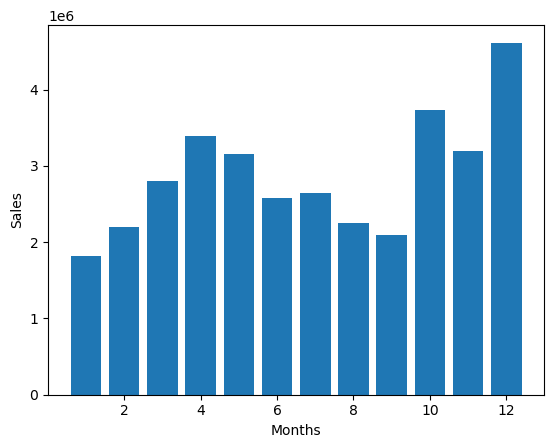

In [20]:
months=range(1,13)
plt.bar(months,(df.groupby(['Month'])['Sales'].sum()))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

##### Our sales data indicates that december is the peak sales month, achieving record earnings of $4,613,443.34

## What city sold the most product?

In [21]:
df.groupby('city')['Sales'].sum().reset_index()

,city,Sales
0,Atlanta(GA),2795498.58
1,Austin(TX),1819581.75
2,Boston(MA),3661642.01
3,Dallas(TX),2767975.40
4,Los Angeles(CA),5452570.80
5,New York City(NY),4664317.43
6,Portland(ME),449758.27
7,Portland(OR),1870732.34
8,San Francisco(CA),8262203.91
9,Seattle(WA),2747755.48


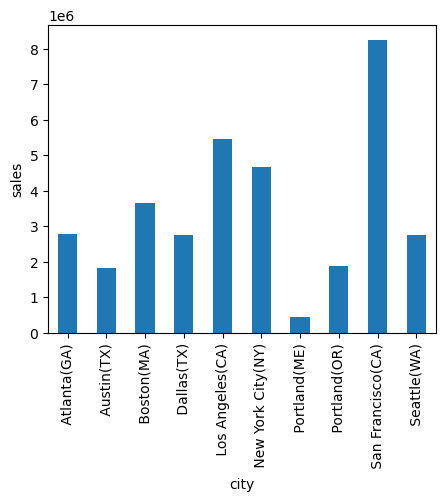

In [22]:
plt.figure(figsize=(5,4))
ax=df.groupby('city')['Sales'].sum().plot(kind='bar')
plt.xlabel('city')
plt.ylabel('sales')
plt.show()

##### According to the data, San Francisco, California(CA), emerges as the top-performing markest, with the highest number of product sales.

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
df['time']=pd.to_datetime(df['Order Date']).dt.time
df['hour']=pd.to_datetime(df['Order Date']).dt.hour
df['minute']=pd.to_datetime(df['Order Date']).dt.minute

df.head()

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\621595180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=pd.to_datetime(df['Order Date']).dt.time
C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\621595180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=pd.to_datetime(df['Order Date']).dt.hour
C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_14236\621595180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time,hour,minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),08:46:00,8,46
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22:30:00,22,30
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14:38:00,14,38
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14:38:00,14,38
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),09:27:00,9,27


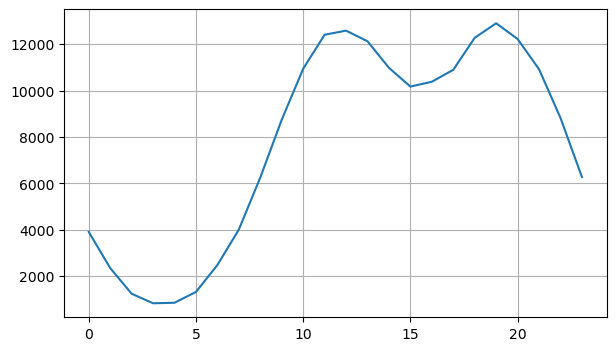

In [24]:
plt.figure(figsize=(7,4))
plt.plot(df.groupby('hour')['hour'].count())
plt.grid()

# My recommendation is slightly before 11am or 7pm

##### Our analysis revels that the most effective advertising times to maximize customer conversion are before 11am or 7pm.

## What products are modfst often sold together?

In [29]:
from itertools import combinations
from collections import Counter

# Filter relevant data where 'Order ID' is not NaN
df = df.dropna(subset=['Order ID'])

# Group by 'Order ID' and aggregate the product column
order_products = df.groupby('Order ID')['Product'].apply(list)

# Use itertools.combinations to find all possible product pairs in each order
combination_list = []
for products in order_products:
    combination_list += list(combinations(products, 2))

# Count the frequency of each combination using collections.Counter
combination_count = Counter(combination_list)

# Convert to a DataFrame to view the most common pairs
common_combinations = pd.DataFrame(combination_count.items(), columns=['Product Pair', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most sold together product pairs
print(common_combinations.head(10))



                                    Product Pair  Count
11            (iPhone, Lightning Charging Cable)   1005
3           (Google Phone, USB-C Charging Cable)    987
7                     (iPhone, Wired Headphones)    447
17              (Google Phone, Wired Headphones)    414
14       (Vareebadd Phone, USB-C Charging Cable)    361
5             (iPhone, Apple Airpods Headphones)    360
4     (Google Phone, Bose SoundSport Headphones)    220
0       (USB-C Charging Cable, Wired Headphones)    160
2            (Vareebadd Phone, Wired Headphones)    143
10  (Lightning Charging Cable, Wired Headphones)     92


##### Sales Data shows iphone and lighting charging cable as leading product pair, followed closely by Google Phone and USB-C charging cable.

## What product sold the most? Why do you think it sold the most?

In [43]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index()

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


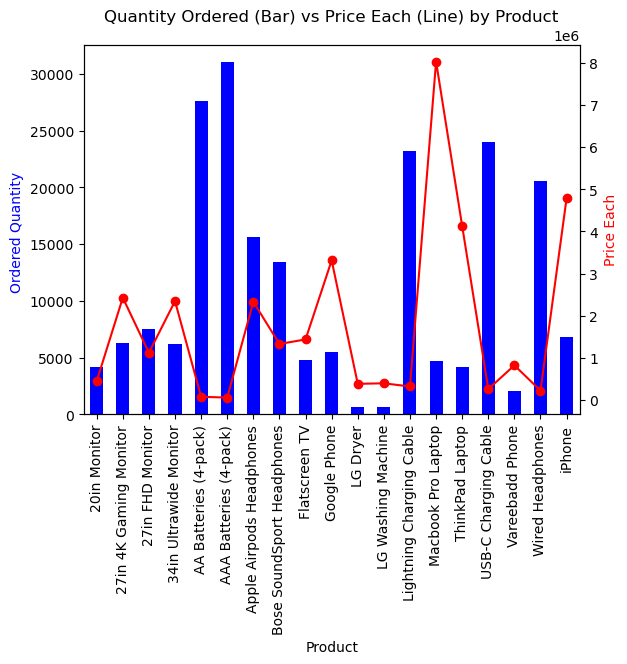

In [60]:
# Create a figure and primary y-axis (ax1)
fig,ax1 = plt.subplots()

# Bar chart on ax1
df.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar',ax=ax1,color='b')
plt.xlabel('Product')
plt.ylabel('Ordered Quantity ',color='b')

# Create a second y-axis sharing the same x-axis (ax2)
ax2=ax1.twinx()

# Line chart on ax2
df.groupby('Product')['Price Each'].sum().plot(kind='line',ax=ax2,color='r',marker='o')
ax2.set_ylabel('Price Each',color='r')

# Show the plot
plt.title('Quantity Ordered (Bar) vs Price Each (Line) by Product')
plt.show()

##### Our sales data reveals that the affordability of AAA batteries contributed to higest sales volume among all products.